In [1]:
#!pip install pyspellchecker

     |████████████████████████████████| 1.9 MB 4.2 MB/s eta 0:00:01


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # Library for string operations

import os

# plotly library
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt #Another plotting libraray

# word cloud library
from wordcloud import WordCloud

#Regex library
import re

#Spell Checker
from spellchecker import SpellChecker 
spell = SpellChecker()

In [4]:
TrainDataSet= pd.read_csv('../input/nlp-getting-started/train.csv')
TestDataSet=pd.read_csv('../input/nlp-getting-started/test.csv')
TrainDataSet.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [5]:
TrainDataSet[TrainDataSet["target"] == 0]["text"].values[0:120]


array(["What's up man?", 'I love fruits', 'Summer is lovely',
       'My car is so fast', 'What a goooooooaaaaaal!!!!!!',
       'this is ridiculous....', 'London is cool ;)', 'Love skiing',
       'What a wonderful day!', 'LOOOOOOL',
       "No way...I can't eat that shit", 'Was in NYC last week!',
       'Love my girlfriend', 'Cooool :)', 'Do you like pasta?',
       'The end!',
       'We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw',
       'Crying out for more! Set me ablaze',
       'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE http://t.co/qqsmshaJ3N',
       "@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.",
       'Ablaze for you Lord :D',
       'Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN21 http://t.co/YDUiXEfIpE http://t.co/LxTjc87KLS #nsfw',
       "on the outside you're ablaze and alive\nbut you're dead inside",
       'Had an awesome time visiting the C

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0,stop_words="english", max_features=200)
counts = cv.fit_transform(TrainDataSet["text"][0:500]).toarray().ravel()
words = np.array(cv.get_feature_names()) 
#counts = counts / float(counts.max())
#print(words)
print(counts)

[0 0 0 ... 0 0 0]


# Data Cleaning

We need to clean the data to avoid errors and incorrect results

* **Remove URL from the tweet**
URL'S some error during processing so we are using regex library to remove the urls

In [7]:
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(x)))
TrainDataSet.tail(3)

,id,keyword,location,text,target
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [8]:
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', str(x)))
TestDataSet.tail(3)

,id,keyword,location,text
3260,10868,NaN,NaN,Green Line derailment in Chicago
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO)
3262,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...


* **Remove Emoji from the tweet**
we need to remove emoji from the tweet since people are using lot of emojies in there tweet to express emotions. We need to create function so we can specify different emoji patterns with range of unicode characters, the list is not complete but good for now.

In [9]:
def EmojiCleanser(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [10]:
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: EmojiCleanser(str(x)))
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: EmojiCleanser(str(x)))
TrainDataSet.tail(3)

,id,keyword,location,text,target
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


* **Remove HTML Tags from Tweet**
we need to remove html tags so we can avoid creating unncessary tokens. we can use a regex expression to remove those tags.

In [11]:
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(x)))
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(x)))
TrainDataSet.tail(3)

,id,keyword,location,text,target
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii.,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


* **Remove Punctuations from the Tweet**
we need to remove the puntuations from tweet so we are using string libraray to remove the punctuations

In [12]:
TestDataSet['text'] = TestDataSet['text'].apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))
TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: str(x).translate(str.maketrans('','',string.punctuation)))
TrainDataSet.tail(3)


,id,keyword,location,text,target
7610,10871,NaN,NaN,M194 0104 UTC5km S of Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an ebike collided w...,1
7612,10873,NaN,NaN,The Latest More Homes Razed by Northern Califo...,1


*** Spell correction in tweets**
We need to correct the spelling in tweets so we will get more accurate tokens. We can use SpellChecker in pyspellchecker library.

In [ ]:
#TestDataSet['text'] = TestDataSet['text'].apply(lambda x: " ".join([spell.correction(i) for i in str(x).split()]))
#TrainDataSet['text'] = TrainDataSet['text'].apply(lambda x: " ".join([spell.correction(i) for i in str(x).split()]))
#TrainDataSet.tail(3)


In [13]:
# filling missing values 
#TrainDataSet[['keyword']] = TrainDataSet[['keyword']].fillna('Not Identified')
#TrainDataSet[['location']] = TrainDataSet[['location']].fillna('Not Identified')

TrainDataSet = TrainDataSet[TrainDataSet.keyword.notnull()]
TrainDataSet = TrainDataSet[TrainDataSet.location.notnull()]


Grouped_Disaster = TrainDataSet.groupby(['keyword'])['id'].count().reset_index()
Grouped_Location = TrainDataSet.groupby(['location'])['id'].count().reset_index()

Grouped_Disaster = Grouped_Disaster.query('keyword !="Not Identified"' )
Grouped_Location = Grouped_Location.query('location !="Not Location"' )

Group_Disaster_filter = Grouped_Disaster.sort_values('id',ascending=False)[:20][::-1]
Grouped_Location_filter = Grouped_Location.sort_values('id',ascending=False)[:20][::-1]

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Top 20 Disaster by Tweets","Top 20 Tweet Location")
)

fig.add_trace(go.Bar(name='id',text='id', x=Group_Disaster_filter['keyword'], y=Group_Disaster_filter['id']),
              row=1, col=1)


fig.add_trace(go.Bar(name='id',text='id', x=Grouped_Location_filter['location'], y=Grouped_Location_filter['id']),
              row=1, col=2)

fig.update_layout(height=700,title_text="Tweets Breakdown", showlegend=False)

fig.show()

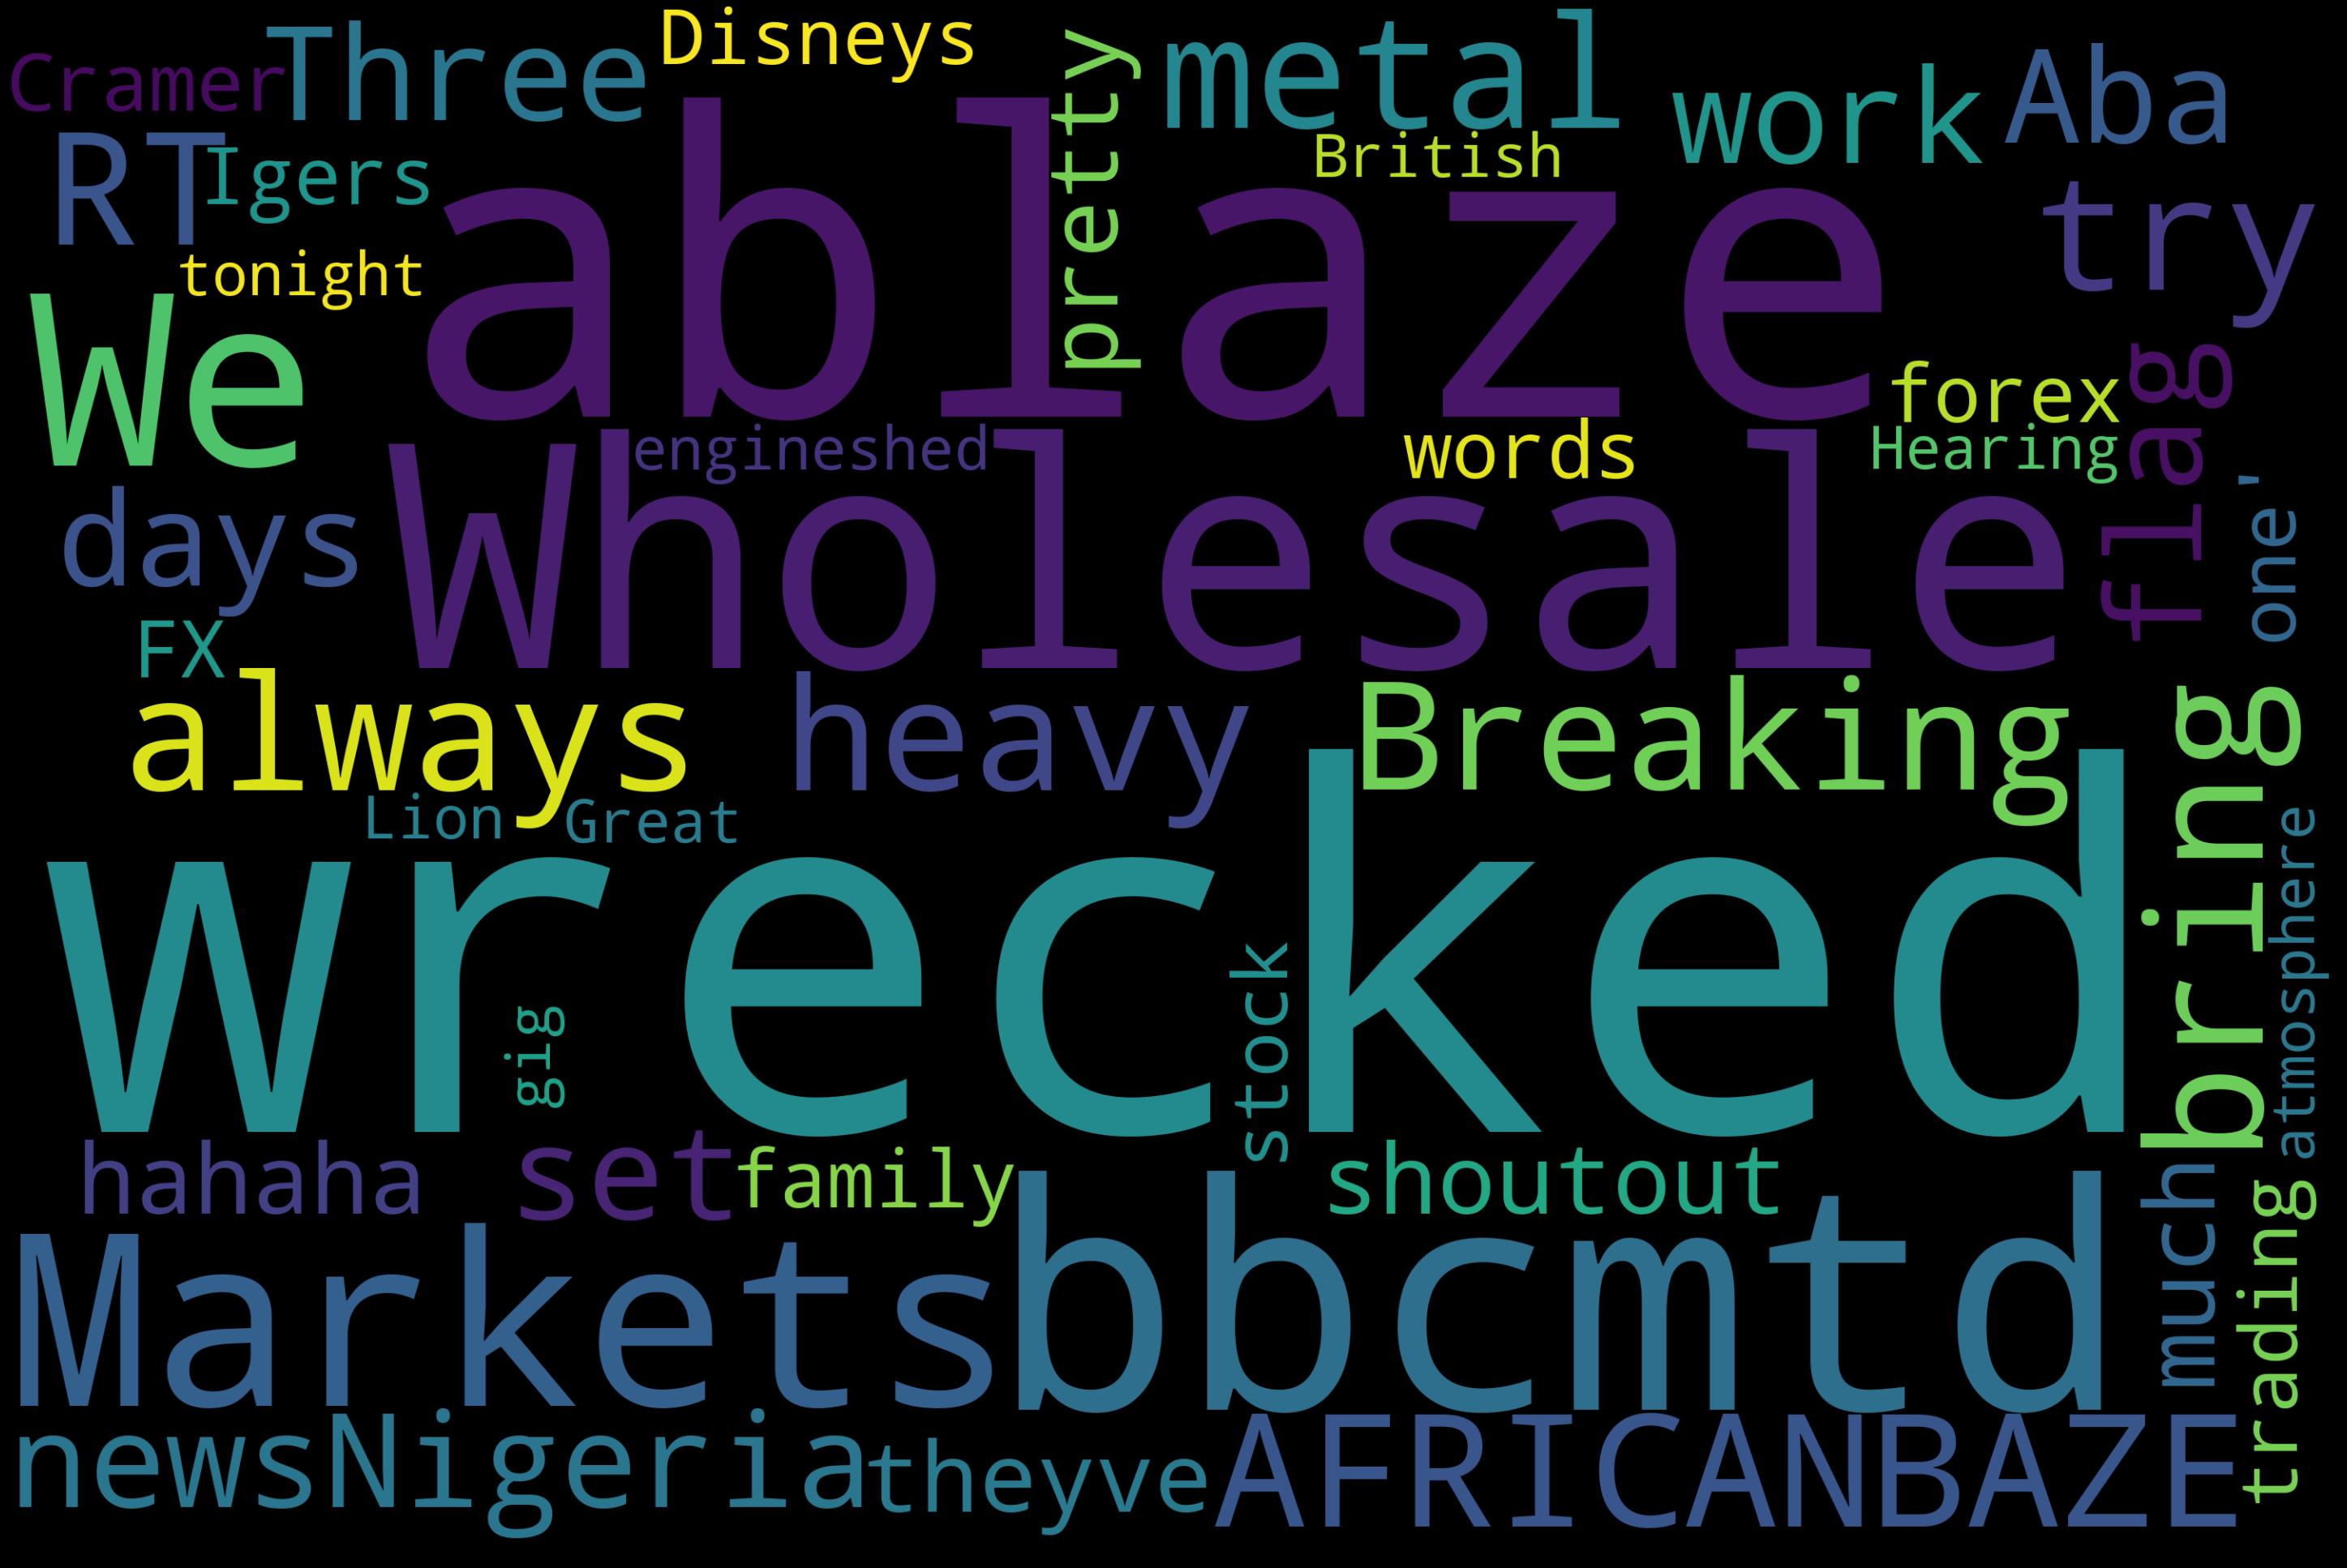

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = TrainDataSet.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [15]:
#TrainDataSet.tail(20)
TrainDataSet[TrainDataSet["target"] == 0]["text"].values[0:120]


array(['We always try to bring the heavy metal RT ',
       'Crying out for more Set me ablaze',
       'On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE ',
       'PhDSquares mufc theyve built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season',
       'Ablaze for you Lord D', 'Check these out     nsfw',
       'Had an awesome time visiting the CFC head office the ancop site and ablaze Thanks to Tita Vida for taking care of us ',
       'Check these out     nsfw',
       'First night with retainers in Its quite weird Better get used to it I have to wear them every single night for the next year at least',
       'SANTA CRUZ \x89ÛÓ Head of the St Elizabeth Police Superintendent Lanford Salmon has r    ',
       'Noches ElBestia AlexisSanchez happy to see my teammates and training hard  goodnight gunners ',
       'Set our hearts ablaze and every city was a gift And every skyline was like a kiss upon the lips \x89Û ',
       'They sky was abla